In [2]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import re
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

#### Leer datos

In [26]:
df = pd.read_csv("embeddings.csv", encoding='utf-8')

dict_data = np.load('embeddings.npz')
embeddings = dict_data['arr_0']

In [28]:
df['class'] = df['filename'].apply(lambda x: x.split("_")[1])

In [11]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000, random_state=22, n_jobs=6)
tsne_model = tsne.fit_transform(embeddings)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 19010 samples in 0.009s...
[t-SNE] Computed neighbors for 19010 samples in 12.705s...
[t-SNE] Computed conditional probabilities for sample 1000 / 19010
[t-SNE] Computed conditional probabilities for sample 2000 / 19010
[t-SNE] Computed conditional probabilities for sample 3000 / 19010
[t-SNE] Computed conditional probabilities for sample 4000 / 19010
[t-SNE] Computed conditional probabilities for sample 5000 / 19010
[t-SNE] Computed conditional probabilities for sample 6000 / 19010
[t-SNE] Computed conditional probabilities for sample 7000 / 19010
[t-SNE] Computed conditional probabilities for sample 8000 / 19010
[t-SNE] Computed conditional probabilities for sample 9000 / 19010
[t-SNE] Computed conditional probabilities for sample 10000 / 19010
[t-SNE] Computed conditional probabilities for sample 11000 / 19010
[t-SNE] Computed conditional probabilities for sample 12000 / 19010
[t-SNE] Computed conditional probabilities for s

<AxesSubplot:xlabel='tsne-2d-oneResnet', ylabel='tsne-2d-twoResnet'>

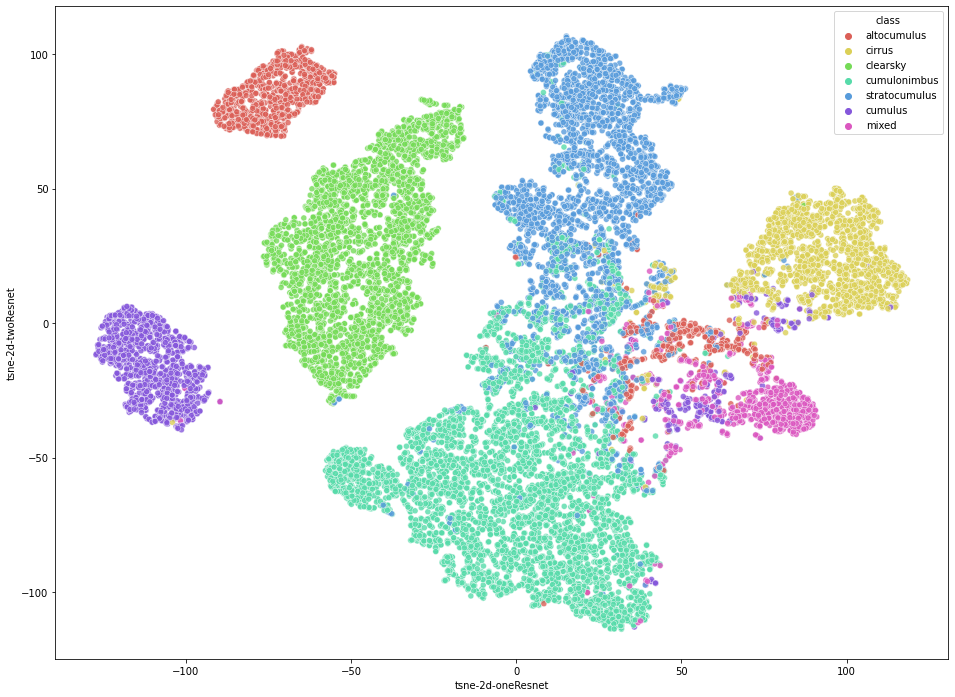

In [38]:
df['tsne-2d-oneResnet'] = tsne_model[:,0]
df['tsne-2d-twoResnet'] = tsne_model[:,1]

plt.figure(figsize=(16,12))


dfplot = df.sample(df.shape[0])

sns.scatterplot(
    x="tsne-2d-oneResnet", y="tsne-2d-twoResnet",
    hue="class",
    palette=sns.color_palette("hls", dfplot['class'].nunique()),
    data=dfplot,
    legend="full",
    alpha=0.8
)